<a href="https://colab.research.google.com/github/alexx99-hs/music-ml-lab/blob/main/01_audio_representation/genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!git clone https://github.com/alexx99-hs/music-ml-lab.git


Cloning into 'music-ml-lab'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 31 (delta 13), reused 7 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 359.90 KiB | 11.61 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [30]:
import sys
import os

SRC_PATH = "/content/music-ml-lab/01_audio_representation"
sys.path.append(SRC_PATH)

print("Source path added:", SRC_PATH)


Source path added: /content/music-ml-lab/01_audio_representation


In [31]:
from extract_features import extract_audio_features

print("Import successful")

features_from_module = extract_audio_features(audio_path)

print("Feature vector shape:", features_from_module.shape)
features_from_module


Import successful
Feature vector shape: (30,)


array([-2.52099823e+02,  1.37903137e+02, -1.11289291e+01,  8.36325359e+00,
        7.31254041e-01,  1.58883750e+00, -3.73188496e+00, -4.13491249e+00,
       -5.49928236e+00, -2.63162041e+00, -3.53242660e+00, -3.14326167e+00,
       -1.84634411e+00,  1.10259804e+02,  3.82814217e+01,  2.70522861e+01,
        1.09539042e+01,  1.08413677e+01,  7.29447412e+00,  7.50223064e+00,
        6.18603182e+00,  6.60910988e+00,  6.13546944e+00,  6.56261873e+00,
        7.68756962e+00,  6.61659145e+00,  1.50393230e+03,  7.44708230e+02,
        7.84165337e-02,  4.94555534e-02])

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

PROJECT_ROOT = "/content/drive/MyDrive/music-ml-lab"
os.makedirs(PROJECT_ROOT, exist_ok=True)

print("Project root:", PROJECT_ROOT)


Project root: /content/drive/MyDrive/music-ml-lab


In [3]:
!pip install -q librosa soundfile numpy scipy matplotlib scikit-learn pandas
import librosa
import numpy as np
import matplotlib.pyplot as plt

print("librosa version:", librosa.__version__)
print("numpy version:", np.__version__)


librosa version: 0.11.0
numpy version: 2.0.2


In [4]:
DATA_ROOT = f"{PROJECT_ROOT}/data"
RAW_AUDIO_DIR = f"{DATA_ROOT}/raw"

os.makedirs(RAW_AUDIO_DIR, exist_ok=True)

print("Raw audio dir:", RAW_AUDIO_DIR)


Raw audio dir: /content/drive/MyDrive/music-ml-lab/data/raw


In [5]:
import os

# Create Kaggle config directory
os.makedirs("/root/.kaggle", exist_ok=True)


In [6]:
%%writefile /root/.kaggle/kaggle.json
{
  "username": "mahrokhhassani",
  "key": "KGAT_64db9e43006dbfe9e693b1cba2546dff"
}


Writing /root/.kaggle/kaggle.json


In [7]:
!chmod 600 /root/.kaggle/kaggle.json


In [8]:
!pip install -q kaggle
DATA_ROOT = f"{PROJECT_ROOT}/data"
RAW_AUDIO_DIR = f"{DATA_ROOT}/raw"

os.makedirs(RAW_AUDIO_DIR, exist_ok=True)

!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification -p {RAW_AUDIO_DIR}


Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
gtzan-dataset-music-genre-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
import zipfile

zip_path = os.path.join(RAW_AUDIO_DIR, "gtzan-dataset-music-genre-classification.zip")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(RAW_AUDIO_DIR)

print("Extraction complete")


KeyboardInterrupt: 

In [12]:
import os

base_path = os.path.join(RAW_AUDIO_DIR, "Data", "genres_original")

genres = sorted(os.listdir(base_path))
print("Genres found:", genres)
print("Number of genres:", len(genres))

for g in genres:
    files = os.listdir(os.path.join(base_path, g))
    print(g, ":", len(files))


Genres found: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Number of genres: 10
blues : 100
classical : 100
country : 100
disco : 100
hiphop : 100
jazz : 100
metal : 100
pop : 100
reggae : 100
rock : 100


In [13]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

BASE_AUDIO_PATH = os.path.join(RAW_AUDIO_DIR, "Data", "genres_original")

genre = "jazz"  # change later if you want
filename = os.listdir(os.path.join(BASE_AUDIO_PATH, genre))[0]

audio_path = os.path.join(BASE_AUDIO_PATH, genre, filename)
audio_path


'/content/drive/MyDrive/music-ml-lab/data/raw/Data/genres_original/jazz/jazz.00000.wav'

In [14]:
y, sr = librosa.load(audio_path, sr=None)

print("Signal shape:", y.shape)
print("Sample rate:", sr)
print("Duration (sec):", len(y) / sr)


Signal shape: (661794,)
Sample rate: 22050
Duration (sec): 30.013333333333332


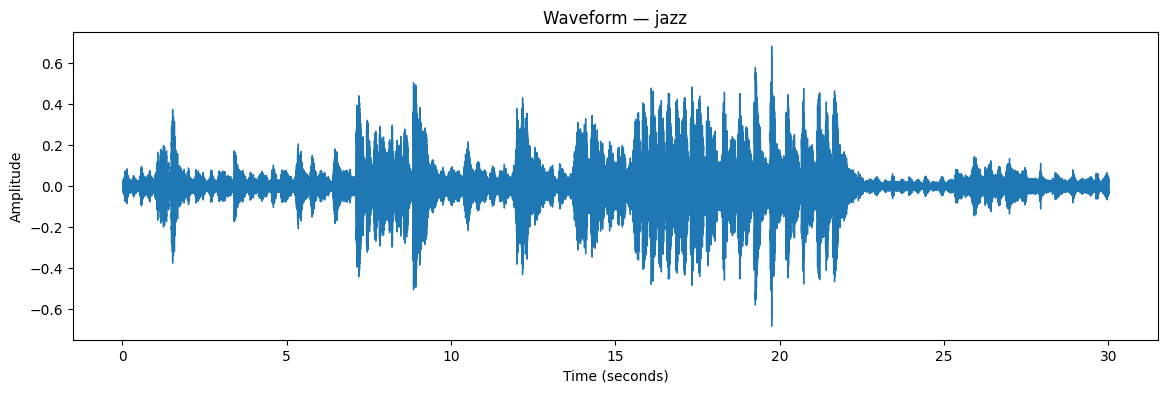

In [15]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform — {genre}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [16]:
mel_spec = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_mels=128,
    fmax=sr // 2
)

mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

print("Mel-spectrogram shape:", mel_spec_db.shape)


Mel-spectrogram shape: (128, 1293)


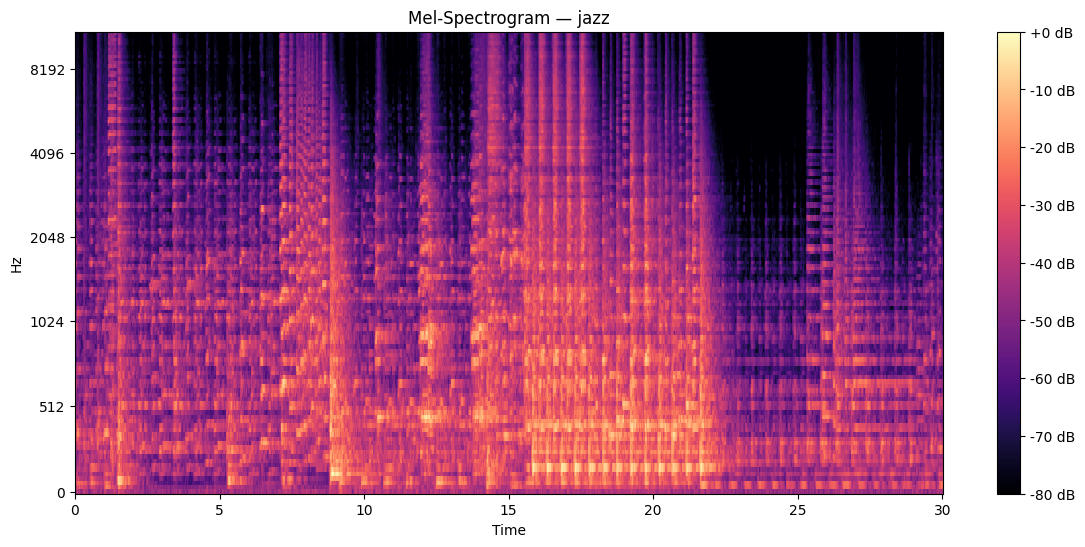

In [17]:
plt.figure(figsize=(14, 6))
librosa.display.specshow(
    mel_spec_db,
    sr=sr,
    x_axis="time",
    y_axis="mel",
    fmax=sr // 2
)
plt.colorbar(format="%+2.0f dB")
plt.title(f"Mel-Spectrogram — {genre}")
plt.show()


MFCC shape: (13, 1293)


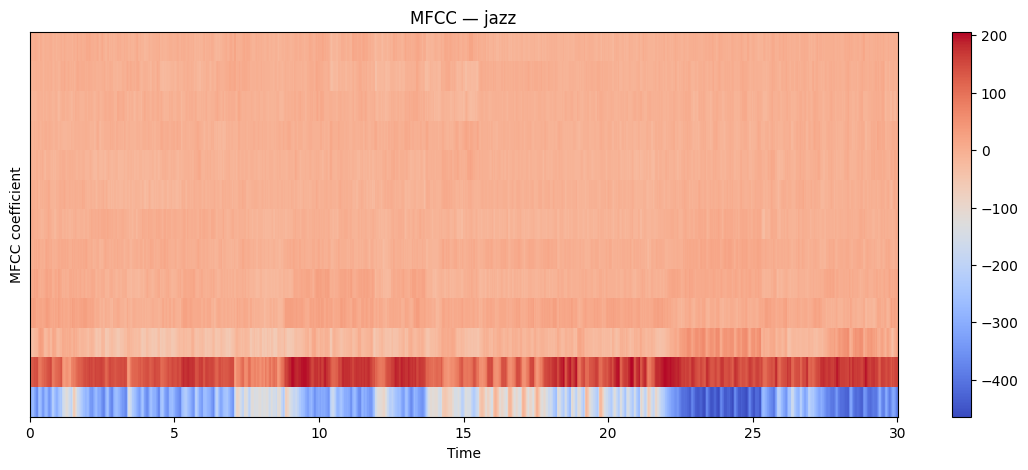

Spectral centroid shape: (1, 1293)
Mean spectral centroid: 1503.9322999254405
ZCR shape: (1, 1293)
Mean ZCR: 0.07841653373936582
Final feature vector length: (30,)


In [18]:
import numpy as np

mfcc = librosa.feature.mfcc(
    y=y,
    sr=sr,
    n_mfcc=13
)

print("MFCC shape:", mfcc.shape)
plt.figure(figsize=(14, 5))
librosa.display.specshow(
    mfcc,
    x_axis="time",
    sr=sr
)
plt.colorbar()
plt.title(f"MFCC — {genre}")
plt.ylabel("MFCC coefficient")
plt.show()

spectral_centroid = librosa.feature.spectral_centroid(
    y=y,
    sr=sr
)

print("Spectral centroid shape:", spectral_centroid.shape)
print("Mean spectral centroid:", np.mean(spectral_centroid))
zcr = librosa.feature.zero_crossing_rate(y)

print("ZCR shape:", zcr.shape)
print("Mean ZCR:", np.mean(zcr))
feature_vector = np.hstack([
    np.mean(mfcc, axis=1),
    np.std(mfcc, axis=1),
    np.mean(spectral_centroid),
    np.std(spectral_centroid),
    np.mean(zcr),
    np.std(zcr)
])

print("Final feature vector length:", feature_vector.shape)


In [33]:
import pandas as pd
from tqdm import tqdm

DATASET_PATH = os.path.join(
    RAW_AUDIO_DIR, "Data", "genres_original"
)

genres = sorted(os.listdir(DATASET_PATH))
genre_to_label = {genre: idx for idx, genre in enumerate(genres)}

print("Genre to label mapping:")
genre_to_label
features = []
labels = []
file_paths = []

for genre in genres:
    genre_dir = os.path.join(DATASET_PATH, genre)
    files = os.listdir(genre_dir)

    for file in tqdm(files, desc=f"Processing {genre}"):
        audio_path = os.path.join(genre_dir, file)

        try:
            feature_vector = extract_audio_features(audio_path)
            features.append(feature_vector)
            labels.append(genre_to_label[genre])
            file_paths.append(audio_path)

        except Exception as e:
            print(f"Error processing {audio_path}: {e}")
X = np.vstack(features)
y = np.array(labels)

print("X shape:", X.shape)
print("y shape:", y.shape)

df = pd.DataFrame(X)
df["label"] = y
df["genre"] = [genres[l] for l in y]

df.head()

PROCESSED_DIR = os.path.join(DATA_ROOT, "processed")
os.makedirs(PROCESSED_DIR, exist_ok=True)

csv_path = os.path.join(PROCESSED_DIR, "gtzan_audio_features.csv")
df.to_csv(csv_path, index=False)

print("Saved features to:", csv_path)


Genre to label mapping:


Processing jazz:  54%|█████▍    | 54/100 [00:07<00:05,  7.99it/s]/content/music-ml-lab/01_audio_representation/extract_features.py:23: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing jazz:  56%|█████▌    | 56/100 [00:07<00:07,  6.00it/s]

Error processing /content/drive/MyDrive/music-ml-lab/data/raw/Data/genres_original/jazz/jazz.00054.wav: 


Processing rock: 100%|██████████| 100/100 [00:14<00:00,  6.89it/s]


X shape: (999, 30)
y shape: (999,)
Saved features to: /content/drive/MyDrive/music-ml-lab/data/processed/gtzan_audio_features.csv


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(csv_path)

X = df.drop(columns=["label", "genre"]).values
y = df["label"].values

print("Loaded X shape:", X.shape)
print("Loaded y shape:", y.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(
    max_iter=1000,
    multi_class="multinomial",
    n_jobs=-1
)

clf.fit(X_train_scaled, y_train)


Loaded X shape: (999, 30)
Loaded y shape: (999,)
Train size: (799, 30)
Test size: (200, 30)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', n_jobs=-1)

Test accuracy: 0.665


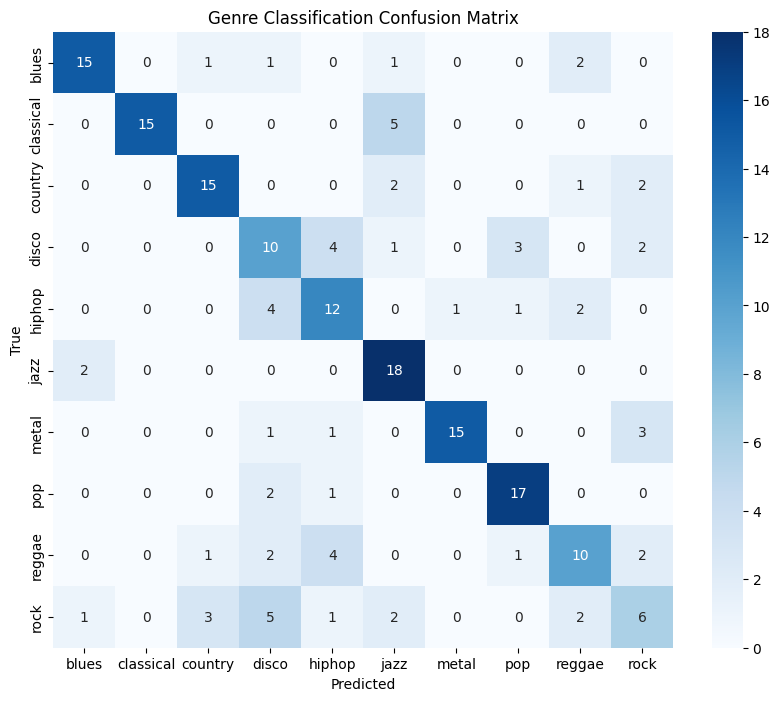

In [36]:
y_pred = clf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", acc)
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    xticklabels=genres,
    yticklabels=genres,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Genre Classification Confusion Matrix")
plt.show()


## Phase 2A — CNN on Mel-Spectrograms


In [37]:
# Spectrogram parameters (keep these fixed!)
N_MELS = 128
HOP_LENGTH = 512
N_FFT = 2048


Mel tensor shape: (128, 1280)


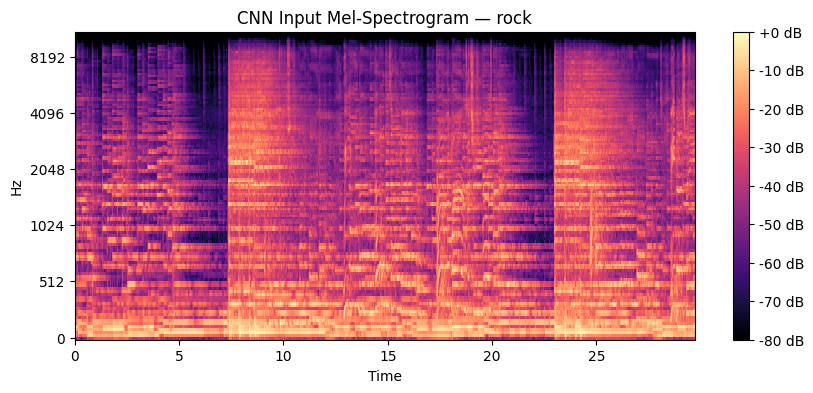

In [38]:
def compute_mel_spectrogram(audio_path, max_len=1280):
    """
    Compute a fixed-size Mel-spectrogram for CNN input.
    Output shape: (N_MELS, max_len)
    """
    y, sr = librosa.load(audio_path, sr=None)

    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=N_FFT,
        hop_length=HOP_LENGTH,
        n_mels=N_MELS
    )

    mel_db = librosa.power_to_db(mel, ref=np.max)

    # Pad or truncate time dimension
    if mel_db.shape[1] < max_len:
        pad_width = max_len - mel_db.shape[1]
        mel_db = np.pad(mel_db, ((0, 0), (0, pad_width)), mode="constant")
    else:
        mel_db = mel_db[:, :max_len]

    return mel_db

mel_test = compute_mel_spectrogram(audio_path)

print("Mel tensor shape:", mel_test.shape)

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    mel_test,
    sr=sr,
    hop_length=HOP_LENGTH,
    x_axis="time",
    y_axis="mel"
)
plt.title(f"CNN Input Mel-Spectrogram — {genre}")
plt.colorbar(format="%+2.0f dB")
plt.show()


In [39]:
X_spec = []
y_spec = []

print("Initialized spectrogram dataset containers")
from tqdm import tqdm

for genre in genres:
    genre_dir = os.path.join(DATASET_PATH, genre)
    files = os.listdir(genre_dir)

    for file in tqdm(files, desc=f"Spectrograms: {genre}"):
        audio_path = os.path.join(genre_dir, file)

        try:
            mel = compute_mel_spectrogram(audio_path)
            X_spec.append(mel)
            y_spec.append(genre_to_label[genre])

        except Exception as e:
            print(f"Skipping {audio_path}: {e}")

X_spec = np.array(X_spec)
y_spec = np.array(y_spec)

print("X_spec shape:", X_spec.shape)
print("y_spec shape:", y_spec.shape)
X_spec = X_spec[..., np.newaxis]

print("X_spec shape with channel:", X_spec.shape)
spec_path = os.path.join(PROCESSED_DIR, "gtzan_mel_spectrograms.npy")
labels_path = os.path.join(PROCESSED_DIR, "gtzan_mel_labels.npy")

np.save(spec_path, X_spec)
np.save(labels_path, y_spec)

print("Saved spectrograms to:", spec_path)
print("Saved labels to:", labels_path)


Initialized spectrogram dataset containers


Spectrograms: jazz:  54%|█████▍    | 54/100 [00:02<00:02, 21.42it/s]/tmp/ipython-input-3773307621.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Spectrograms: jazz:  57%|█████▋    | 57/100 [00:03<00:02, 15.02it/s]

Skipping /content/drive/MyDrive/music-ml-lab/data/raw/Data/genres_original/jazz/jazz.00054.wav: 


Spectrograms: rock: 100%|██████████| 100/100 [00:06<00:00, 15.72it/s]


X_spec shape: (999, 128, 1280)
y_spec shape: (999,)
X_spec shape with channel: (999, 128, 1280, 1)
Saved spectrograms to: /content/drive/MyDrive/music-ml-lab/data/processed/gtzan_mel_spectrograms.npy
Saved labels to: /content/drive/MyDrive/music-ml-lab/data/processed/gtzan_mel_labels.npy


In [43]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load saved spectrogram data
X_spec = np.load(spec_path)
y_spec = np.load(labels_path)

print("Loaded X_spec:", X_spec.shape)
print("Loaded y_spec:", y_spec.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X_spec,
    y_spec,
    test_size=0.2,
    random_state=42,
    stratify=y_spec
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)
# Normalize to [0, 1]
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128, 1280, 1)),

    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(len(genres), activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.2
)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("CNN Test accuracy:", test_acc)


Loaded X_spec: (999, 128, 1280, 1)
Loaded y_spec: (999,)
Train: (799, 128, 1280, 1)
Test: (200, 128, 1280, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 1278, 32)  │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 639, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 637, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 318, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 316, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 158, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 283136)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    36,241,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,335,498 (138.61 MB)

 Trainable params: 36,335,498 (138.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.0828 - loss: 3.1939 - val_accuracy: 0.2250 - val_loss: 2.2456
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.1828 - loss: 2.2262 - val_accuracy: 0.2313 - val_loss: 2.1899
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.1868 - loss: 2.1766 - val_accuracy: 0.2125 - val_loss: 2.0810
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.2224 - loss: 2.1336 - val_accuracy: 0.2375 - val_loss: 2.1386
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.2182 - loss: 2.1036 - val_accuracy: 0.2688 - val_loss: 2.0240
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.2817 - loss: 1.9768 - val_accuracy: 0.2250 - val_loss: 2.0975
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.3556 - loss: 1.8818 - val_accuracy: 0.3375 - val_loss: 2.0132
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.4077 - loss: 1.6991 - val_accuracy: 0.3875 -

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


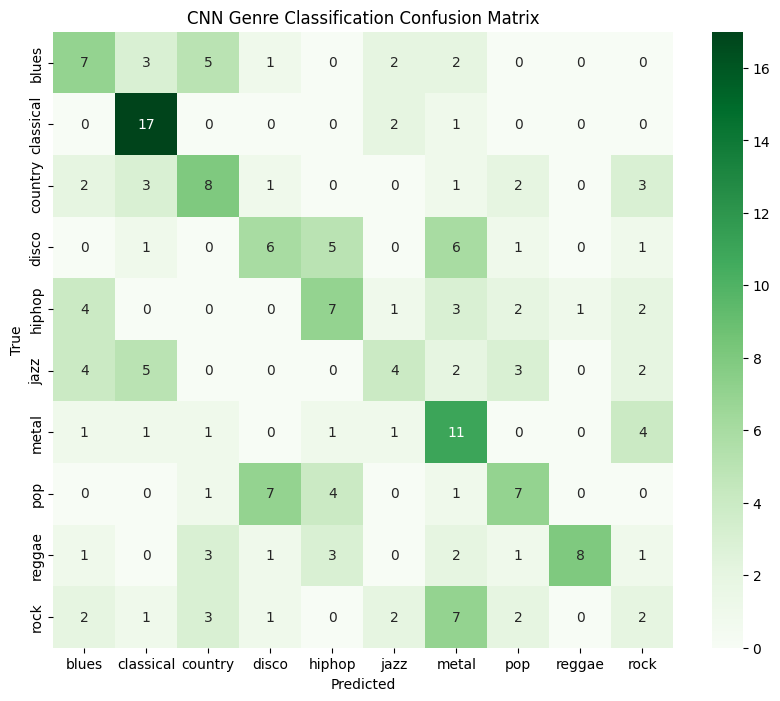

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_cnn = np.argmax(model.predict(X_test), axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred_cnn),
    xticklabels=genres,
    yticklabels=genres,
    annot=True,
    fmt="d",
    cmap="Greens"
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CNN Genre Classification Confusion Matrix")
plt.show()
